ML ASSIGNMENT2- ARUN SINGH SHAH

ARUN SINGH SHAH- 2025aa05340@wilp.bits-pilani.ac.in

In [1]:
#Import Libraries
import os;
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset from official UCI source
credit_data = pd.read_excel(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",
    header=1
)

# Clean column names
credit_data.columns = credit_data.columns.str.strip()

# Rename target column safely
credit_data.rename(
    columns={
        "default payment next month": "target",
        "default.payment.next.month": "target"
    },
    inplace=True
)

# Train-Test Split (80-20, stratified)
credit_train, credit_test = train_test_split(
    credit_data,
    test_size=0.2,
    random_state=42,
    stratify=credit_data["target"]
)

print("Train shape:", credit_train.shape)
print("Test shape:", credit_test.shape)

# Save train and test datasets
credit_train.to_csv("credit_train.csv", index=False)
credit_test.to_csv("credit_test.csv", index=False)

Train shape: (24000, 25)
Test shape: (6000, 25)


In [3]:
# Quick Look on Train dataset - Display first 5 rows of train dataset
credit_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
22788,22789,160000,2,2,2,33,2,2,3,2,...,164310,162681,163005,15000,0,0,6100,12300,6100,0
29006,29007,150000,2,1,2,34,1,-1,-1,-2,...,0,0,0,53,0,0,0,0,0,0
16950,16951,10000,1,2,1,50,1,2,0,0,...,8067,8227,8400,2,1281,1134,294,305,1000,0
22280,22281,220000,2,1,2,29,0,0,0,0,...,218513,131660,134346,9100,9000,7887,4800,4900,6000,1
11346,11347,310000,2,1,2,32,1,-2,-1,0,...,326,-235,-235,0,326,0,0,0,1200,0


In [4]:
#Get Dataset Info for Train data
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 22788 to 27126
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         24000 non-null  int64
 1   LIMIT_BAL  24000 non-null  int64
 2   SEX        24000 non-null  int64
 3   EDUCATION  24000 non-null  int64
 4   MARRIAGE   24000 non-null  int64
 5   AGE        24000 non-null  int64
 6   PAY_0      24000 non-null  int64
 7   PAY_2      24000 non-null  int64
 8   PAY_3      24000 non-null  int64
 9   PAY_4      24000 non-null  int64
 10  PAY_5      24000 non-null  int64
 11  PAY_6      24000 non-null  int64
 12  BILL_AMT1  24000 non-null  int64
 13  BILL_AMT2  24000 non-null  int64
 14  BILL_AMT3  24000 non-null  int64
 15  BILL_AMT4  24000 non-null  int64
 16  BILL_AMT5  24000 non-null  int64
 17  BILL_AMT6  24000 non-null  int64
 18  PAY_AMT1   24000 non-null  int64
 19  PAY_AMT2   24000 non-null  int64
 20  PAY_AMT3   24000 non-null  int64
 21  PAY_AMT4   24

In [5]:
#Shape of Train Dataset
credit_train.shape

(24000, 25)

In [6]:
#Missing Value from Train Dataset
credit_train.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [7]:
# Quick look at TEST dataset
credit_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
6907,6908,50000,1,2,2,46,-1,-1,-1,-1,...,2650,3320,2764,26060,0,3472,2320,1764,2841,0
24575,24576,150000,1,1,1,31,-1,-1,-2,-2,...,0,0,11694,0,0,0,0,11694,30000,0
26766,26767,50000,1,2,2,25,0,0,0,0,...,49949,50479,50702,1800,1844,2200,2000,1800,2038,0
2156,2157,290000,2,1,2,25,0,0,0,0,...,248801,241983,230925,15000,10500,10000,15000,7844,23333,1
3179,3180,500000,2,2,1,27,-2,-2,-2,-2,...,10000,10000,10000,9983,13587,10000,10000,10000,25304,0


In [8]:
# Get info of TEST dataset
credit_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 6907 to 24399
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         6000 non-null   int64
 1   LIMIT_BAL  6000 non-null   int64
 2   SEX        6000 non-null   int64
 3   EDUCATION  6000 non-null   int64
 4   MARRIAGE   6000 non-null   int64
 5   AGE        6000 non-null   int64
 6   PAY_0      6000 non-null   int64
 7   PAY_2      6000 non-null   int64
 8   PAY_3      6000 non-null   int64
 9   PAY_4      6000 non-null   int64
 10  PAY_5      6000 non-null   int64
 11  PAY_6      6000 non-null   int64
 12  BILL_AMT1  6000 non-null   int64
 13  BILL_AMT2  6000 non-null   int64
 14  BILL_AMT3  6000 non-null   int64
 15  BILL_AMT4  6000 non-null   int64
 16  BILL_AMT5  6000 non-null   int64
 17  BILL_AMT6  6000 non-null   int64
 18  PAY_AMT1   6000 non-null   int64
 19  PAY_AMT2   6000 non-null   int64
 20  PAY_AMT3   6000 non-null   int64
 21  PAY_AMT4   6000

In [9]:
# Shape of TEST dataset
credit_test.shape

(6000, 25)

In [10]:
# Missing values in TEST dataset
credit_test.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [11]:
# Describe TEST dataset
credit_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,14973.683417,167364.666667,1.604750,1.853792,1.552875,35.432625,-0.014125,-0.134083,-0.166917,-0.221333,...,43156.661458,40164.412625,38675.979875,5623.556292,5.879975e+03,5215.777583,4790.331833,4769.941750,5229.905500,0.221208
std,8641.664947,129511.313151,0.488915,0.792375,0.521903,9.195256,1.123155,1.198818,1.194166,1.161924,...,64046.730878,60627.850612,59308.737828,16148.316646,2.025298e+04,17513.554475,15060.693585,15048.470405,17850.346975,0.415069
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7513.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1746.000000,1225.000000,1000.000000,8.400000e+02,390.000000,291.000000,246.000000,100.000000,0.000000
50%,14966.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19004.500000,18102.500000,16993.000000,2100.500000,2.014000e+03,1805.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22438.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54386.500000,50142.250000,48977.250000,5018.250000,5.000000e+03,4580.500000,4015.250000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.215471e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
# Describe TEST dataset
credit_test.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,15107.766333,167962.946667,1.599667,1.850500,1.547833,35.697000,-0.027000,-0.132500,-0.163333,-0.218000,...,43688.099000,40899.354333,39654.882500,5823.677333,6.085918e+03,5265.297167,4969.057000,4917.171167,5157.890833,0.221167
std,8734.831845,130698.538357,0.490007,0.782252,0.522262,9.305713,1.126417,1.190734,1.207711,1.197657,...,65468.536253,61471.293451,60524.310508,18128.961193,3.184007e+04,17977.164797,17884.895787,16165.776457,17484.253835,0.415067
min,2.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-53007.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7448.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2302.500000,1885.000000,1368.500000,934.750000,7.920000e+02,391.000000,300.000000,279.750000,189.000000,0.000000
50%,15115.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19201.500000,18144.500000,17339.500000,2100.000000,2.000000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22758.500000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,...,54859.000000,50480.500000,49883.750000,5000.000000,5.000000e+03,4366.250000,4003.250000,4021.250000,4122.250000,0.000000
max,29997.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,706864.000000,514114.000000,499100.000000,493358.000000,1.684259e+06,417588.000000,528897.000000,379267.000000,443001.000000,1.000000


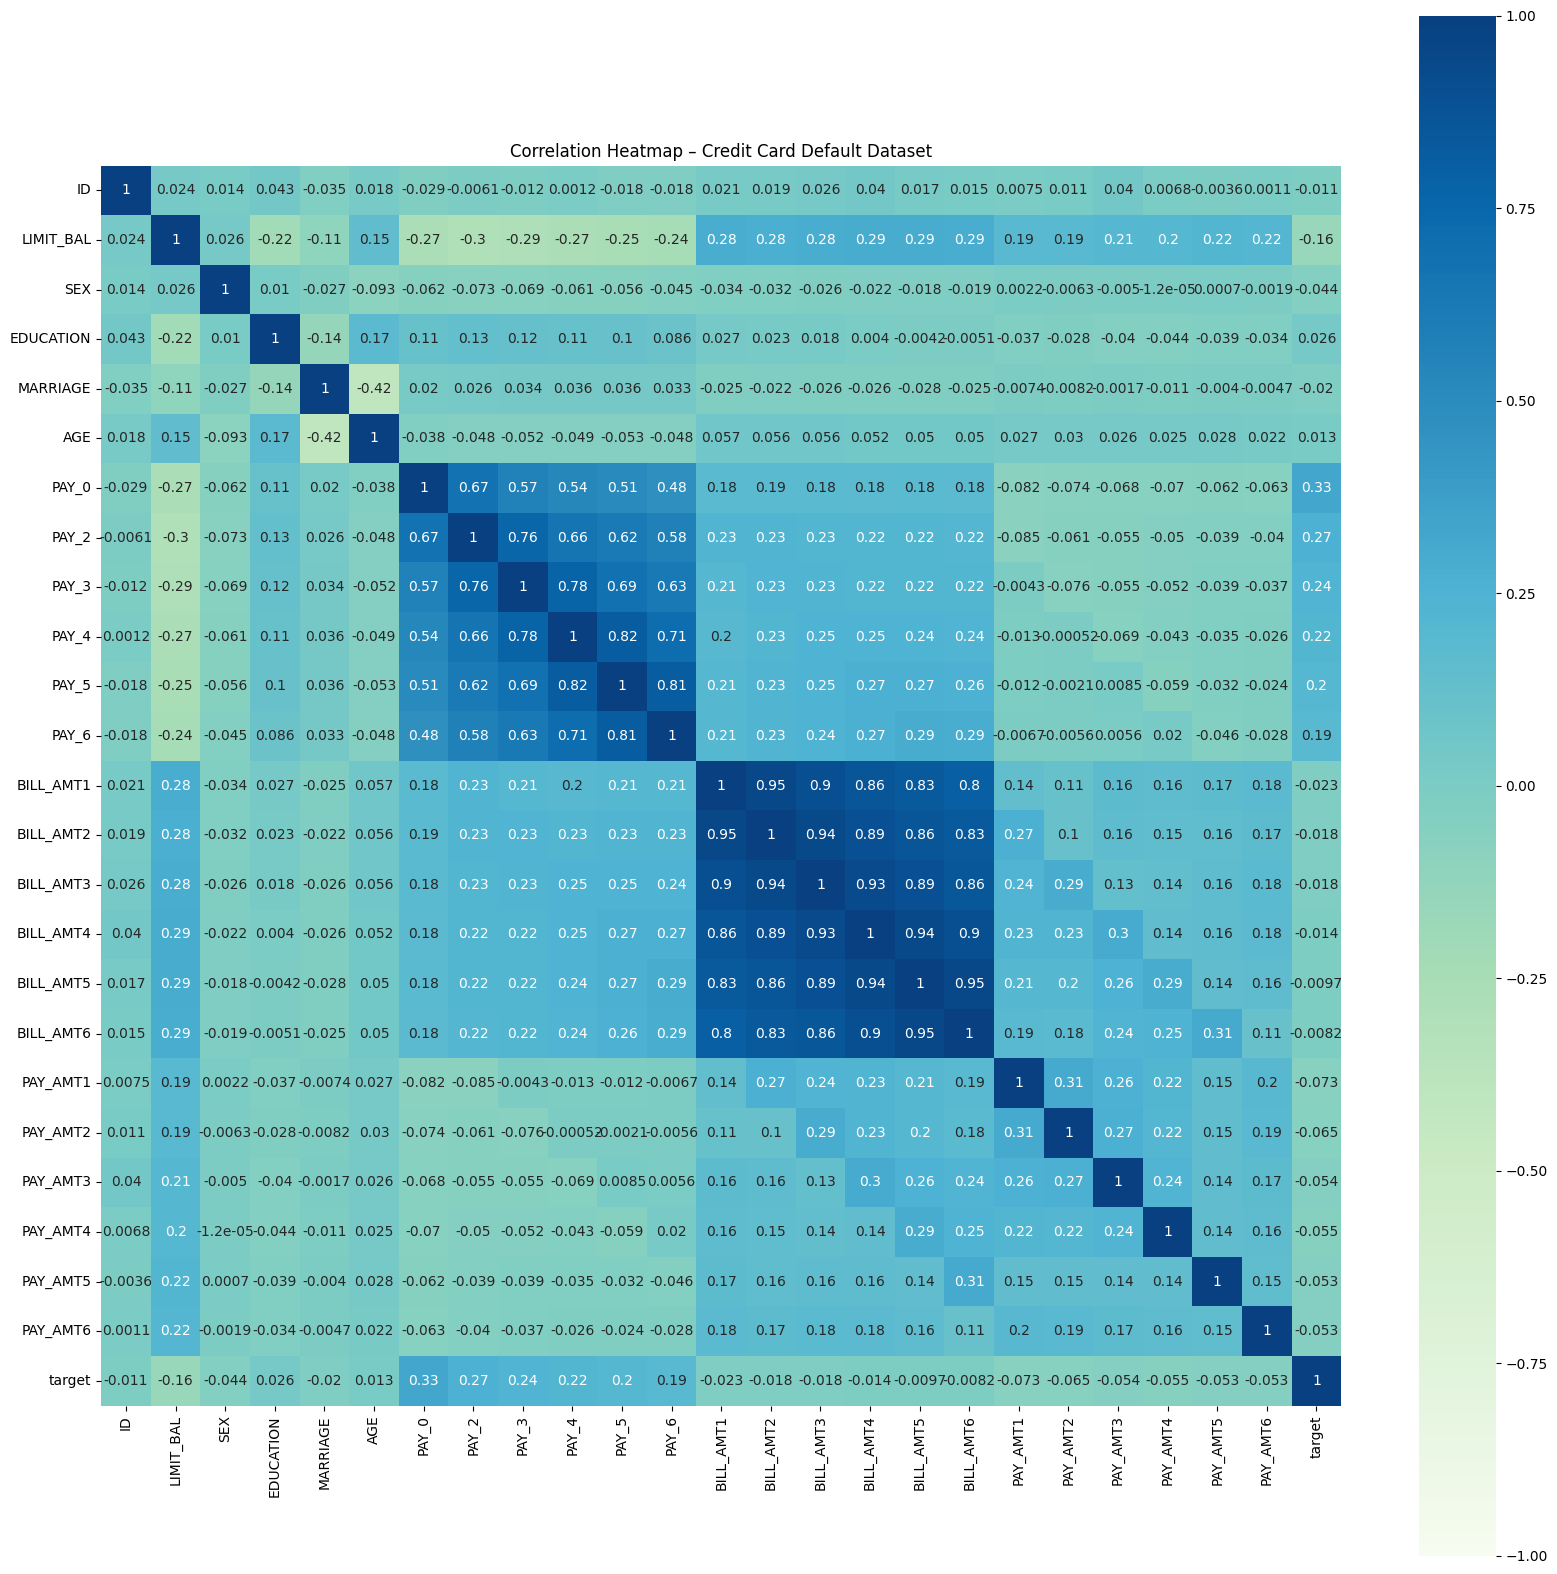

In [13]:
# Find Correlation between features (Credit Card Dataset)

plt.figure(figsize=(20, 20))
sns.heatmap(
    credit_train.corr(numeric_only=True, method='pearson'),
    cmap='GnBu',
    vmin=-1,
    vmax=1,
    annot=True,
    square=True
)

plt.title("Correlation Heatmap – Credit Card Default Dataset")
plt.show()


In [14]:
# Check for categorical columns (Credit Card Dataset)

categorical_cols = credit_train.select_dtypes(include='object').columns.tolist()

print("Categorical columns found:", categorical_cols)


Categorical columns found: []


In [15]:
# Prepare Feature and Target Sets (Credit Card Default Dataset)

X_train = credit_train.drop('target', axis=1)
y_train = credit_train['target']

X_test = credit_test.drop('target', axis=1)
y_test = credit_test['target']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (24000, 24)
Shape of y_train: (24000,)
Shape of X_test: (6000, 24)
Shape of y_test: (6000,)


In [16]:
print("Value counts of y_train:")
print(y_train.value_counts())

print("\nValue counts of y_test:")
print(y_test.value_counts())


Value counts of y_train:
target
0    18691
1     5309
Name: count, dtype: int64

Value counts of y_test:
target
0    4673
1    1327
Name: count, dtype: int64


In [17]:
# Helper Function (Clean Version for Credit Card Default)

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    roc_auc_score,
    confusion_matrix
)

def evaluate_model(model, X_eval, y_test, model_name):
    """Evaluate model and return metrics"""

    # Predictions
    y_pred = model.predict(X_eval)

    # AUC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_eval)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc = 0.0

    # Metrics (Binary Classification)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    return {
        "model_name": model_name,
        "accuracy": round(accuracy, 4),
        "auc": round(auc, 4),
        "precision": round(precision, 4),
        "recall": round(recall, 4),
        "f1": round(f1, 4),
        "mcc": round(mcc, 4),
        "confusion_matrix": cm
    }


In [18]:
# Initialize and Train Ensemble Model - XGBoost Classifier

from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',   # binary classification
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    n_jobs=-1,
    verbosity=0
)

# Train the model (NO SCALING NEEDED)
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_results = evaluate_model(
    xgb_model,
    X_test,
    y_test,
    "XGBoost"
)

print("XGBoost Classifier trained successfully.")


XGBoost Classifier trained successfully.


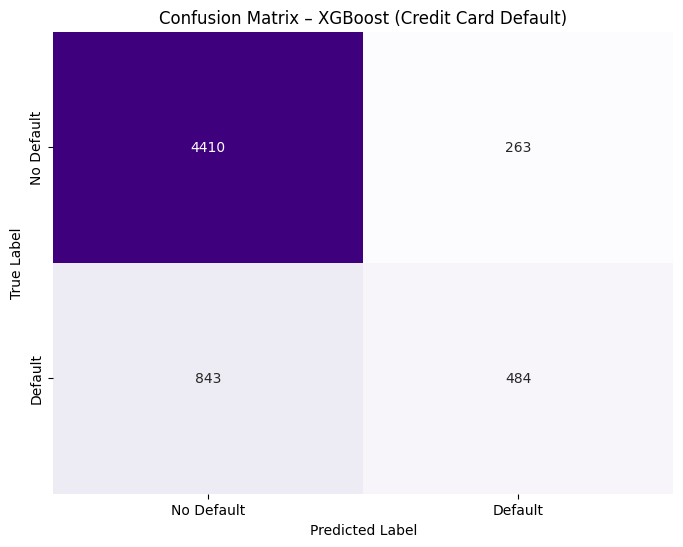

In [19]:
# Create Confusion Matrix for XGBoost

import matplotlib.pyplot as plt
import seaborn as sns

# Extract confusion matrix
cm = xgb_results['confusion_matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Purples',
    cbar=False,
    xticklabels=['No Default', 'Default'],
    yticklabels=['No Default', 'Default']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix – XGBoost (Credit Card Default)')
plt.show()


In [20]:
# Print Evaluation of XGBoost Classifier

print("Evaluation of XGBoost Classifier:\n")

print(f"Accuracy: {float(xgb_results['accuracy']):.4f}")
print(f"AUC Score: {float(xgb_results['auc']):.4f}")
print(f"Precision: {float(xgb_results['precision']):.4f}")
print(f"Recall: {float(xgb_results['recall']):.4f}")
print(f"F1 Score: {float(xgb_results['f1']):.4f}")
print(f"Matthews Correlation Coefficient (MCC): {float(xgb_results['mcc']):.4f}")


Evaluation of XGBoost Classifier:

Accuracy: 0.8157
AUC Score: 0.7765
Precision: 0.6479
Recall: 0.3647
F1 Score: 0.4667
Matthews Correlation Coefficient (MCC): 0.3878


In [21]:
# Predict labels on the test data (NO SCALING)
y_pred_xgb = xgb_model.predict(X_test)

# Create DataFrame with predictions
submission_df = pd.DataFrame({
    'target': y_pred_xgb
})

# Save to CSV
submission_df.to_csv('xgboost_predictions.csv', index=False)

print("Prediction file 'xgboost_predictions.csv' created successfully.")

display(submission_df.head())


Prediction file 'xgboost_predictions.csv' created successfully.


,target
0,0
1,0
2,0
3,0
4,0
